### Sampling the loss manifold

Sampling on an equidistant grid may work for smaller networks. Subspace sampling used with one or two random directions as suggested by [Goodfellow, 2014] may be useful, too.

However, the loss manifold is typically much larger with degrees of freedom easily in the range of $10^6$.

The approach proposed by `tati` is to use dynamics-based sampling using Langevin dynamics in order to gain more insight. 

The general idea is to not only look at randomly selected local minima but at the more overall shape and statistical features of the loss manifold. Finally, we are not sampling from the loss $L$ directly but from the canonial Gibbs measure depending on the loss: $exp(-\beta L)$.

This said, sampling itself using `simulation` is quite similar to training.

It depends principally on the following parameters:

- `batch_size` : if the batch size is chosen smaller than the dataset dimension, then (additional) stochastic noise is added to the gradients.
- `friction_constant` : friction value for Langevin-based samples
- `hamiltonian_dynamics_time` : time passing between Metropolis-Hastings evaluation for HMC
- `inverse_temperature` : inverse temperature value $\beta$ giving an energy scale
- `loss` : the loss function defining the loss manifold to sample from
- `max_steps` : limits the number of points to sample
- `sampler` : name of sampler function
- `seed` : random number seed for added noise (Langevin) or randomly selected momenta (HMC)
- `step_width` : this is like the `learning_rate` in training


In [1]:
import TATi.simulation as tati

Let us look at a sampling run using the BAOAB sampler for the dataset we have already looked at during training.

In [12]:
nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          friction_constant=1.,
          inverse_temperature=1.,
          loss="mean_squared",
          max_steps=100,
          output_activation="linear",
          sampler="BAOAB",
          seed=426,
          step_width=0.1)

Let us start at the position of the minimum found during training. However, we will *not* use `parse_parameters_file` but instead set the parameters directly.

In [13]:
import numpy as np
nn.parameters = np.array([0.14637233, 0.32722256, -0.045677684])
print(nn.parameters, nn.loss())

[0.14637233, 0.32722256, -0.045677684] 0.021974375


We use `sample()` to initiate the sampling run of 100 steps.

In [14]:
sampling_data = nn.sample()

id                   float64
step                 float64
epoch                float64
accuracy              object
loss                  object
time_per_nth_step     object
total_energy          object
kinetic_energy        object
scaled_momentum       object
scaled_gradient       object
virial                object
scaled_noise          object
dtype: object
id                     int64
step                   int64
epoch                  int64
accuracy             float64
loss                 float64
time_per_nth_step    float64
total_energy         float64
kinetic_energy       float64
scaled_momentum      float64
scaled_gradient      float64
virial               float64
scaled_noise         float64
dtype: object
id         float64
step       float64
loss        object
weight0     object
weight1     object
bias0       object
dtype: object
id           int64
step         int64
loss       float64
weight0    float64
weight1    float64
bias0      float64
dtype: object
id                  

Again, we get a instance of type `TrajectoryData` in return.

Let us first look at the run information in `run_info`.

Index(['id', 'step', 'epoch', 'accuracy', 'loss', 'time_per_nth_step',
       'total_energy', 'kinetic_energy', 'scaled_momentum', 'scaled_gradient',
       'virial', 'scaled_noise'],
      dtype='object')


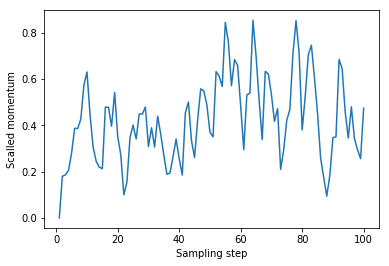

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

print(sampling_data.run_info.columns)
run = sampling_data.run_info[['step','scaled_momentum']].values

plt.plot(run[:,0], run[:,1])
plt.xlabel("Sampling step")
plt.ylabel("Scalled momentum")
plt.show()

#### Sampling properties

With the above sampling, we can look at more properties though, namely running averages.


In [7]:
print(sampling_data.averages.columns)

Index(['id', 'step', 'epoch', 'loss', 'ensemble_average_loss',
       'average_kinetic_energy', 'average_virials', 'average_inertia'],
      dtype='object')


Let us look at the average kinetic energy which is closely connected to the (inverse) temperature $\beta$.

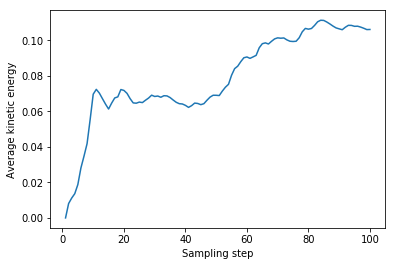

In [9]:
run = sampling_data.averages[['step','average_kinetic_energy']].values

plt.plot(run[:,0], run[:,1])
plt.xlabel("Sampling step")
plt.ylabel("Average kinetic energy")
plt.show()

And finally, let's look at the sampling trajectory.

Moreover, let us load the sampled loss grid from before to get some "background" on where our trajectory is.

In [10]:
sampled_grid = np.loadtxt("loss-grid.csv", delimiter=",", skiprows=0)

Index(['id', 'step', 'loss', 'weight0', 'weight1', 'bias0'], dtype='object')


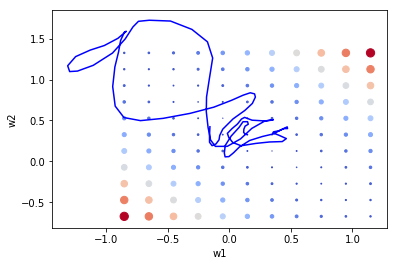

In [15]:
import matplotlib.cm as cm

print(sampling_data.trajectory.columns)
trajectory = sampling_data.trajectory[['weight0','weight1']].values

plt.scatter(sampled_grid[:,0], sampled_grid[:,1], c=sampled_grid[:,2], s=sampled_grid[:,2]*4, cmap=cm.coolwarm)
plt.plot(trajectory[:,0], trajectory[:,1], 'b')
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

The smaller we pick `inverse_temperature`, the higher the walker in this loss valley climbs.

### Summary

- import options affecting sampling
- how to sample
- how to inspect averages obtained from sampling
- how to visualize sampling trajectories